<img src="https://pbs.twimg.com/profile_images/969600936321736704/WrwKmb8y_400x400.jpg" width="200" height="200" />

# FACYnation Hack day
This notebook contains an explanation of the data being used as part of the FACYnation Hack day.




In [2]:
import pandas as pd
import pylab as plt
import numpy as np
import seaborn as sns

%matplotlib inline

## `clim_files`
There are precipitation and temperature climatology files for each crop. In it contain monthly total precipitation and mean temperature measurements for each region (not sure what the season responds to). As an example, lets read in the precipitation and temperature files for maize.

In [3]:
ls ./Crop_data_files/clim_file

precip_climatology_Maize.csv    temp_climatology_Maize.csv
precip_climatology_Rice.csv     temp_climatology_Rice.csv
precip_climatology_Soybean.csv  temp_climatology_Soybean.csv
precip_climatology_Wheat.csv    temp_climatology_Wheat.csv


In [4]:
clim_precip_maize=pd.read_table('./Crop_data_files/clim_file/precip_climatology_Maize.csv')
clim_precip_maize.rename(columns = {'Unnamed: 0':'Crop_season_location'}, inplace = True)
clim_temp_maize=pd.read_table('./Crop_data_files/clim_file/temp_climatology_Maize.csv')
clim_temp_maize.rename(columns = {'Unnamed: 0':'Crop_season_location'}, inplace = True)

In [5]:
clim_precip_maize[0:10]

,Crop_season_location,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Maize_Spring_USA_Ohio,52.761777,50.045758,76.796623,98.220427,116.476743,104.450713,108.432234,91.333840,83.734165,78.038004,81.754893,68.792176
1,Maize_Spring_USA_Minnesota,7.017376,8.554667,32.434670,74.904777,97.957333,120.396073,103.540149,108.179273,84.877427,61.817174,28.888944,11.490966
2,Maize_Summer_China_Henan,10.941580,18.128238,34.362643,47.226727,78.348534,97.348101,186.891395,147.476387,78.204810,48.621850,30.025877,9.343714
3,Maize_Spring_China_Liaoning,0.700592,1.918669,8.140692,29.887255,48.340478,90.430823,179.457812,138.929664,49.345632,31.244514,11.136053,2.179711
4,Maize_Summer_China_Shandong,5.886620,10.701122,17.888108,34.647167,60.514011,84.299045,192.553820,153.303092,63.667248,34.538604,20.966099,7.642590
5,Maize_Spring_USA_Illinois,39.311173,40.544719,72.166429,104.157911,122.487176,115.325049,101.626312,96.852235,88.513945,82.492127,84.322508,56.244241
6,Maize_Spring_USA_Indiana,54.515473,50.966315,81.035918,106.495404,126.852435,112.202063,107.939666,93.822779,87.749408,86.492515,89.763421,70.171306
7,Maize_Summer_China_Shanxi,0.559319,2.609655,11.298355,21.841122,41.849433,62.426302,117.259387,114.150799,63.690989,33.382486,12.394215,1.133610
8,Maize_Spring_USA_Nebraska,7.091140,11.563000,40.769852,77.113913,109.008308,117.617110,90.010977,95.086835,76.735491,55.951674,27.626102,13.630952
9,Maize_Spring_USA_Iowa,12.389073,16.021303,48.048641,94.298929,118.813263,124.363010,108.797291,107.308399,88.867747,68.185133,45.713214,23.084986


In [6]:
clim_temp_maize[0:10]

,Crop_season_location,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Maize_Spring_USA_Ohio,-2.071370,-0.417198,4.642302,11.019271,16.556568,21.341552,23.528094,22.537785,18.666326,12.348698,6.295049,0.336915
1,Maize_Spring_USA_Minnesota,-8.749417,-6.073833,0.654440,8.569846,15.323615,20.465008,22.780350,21.419577,17.035088,9.996546,1.431298,-6.580419
2,Maize_Summer_China_Henan,1.154793,3.577543,8.906664,15.586943,20.823192,25.362553,27.162466,26.051910,21.547124,16.148739,9.171493,3.091786
3,Maize_Spring_China_Liaoning,-12.100253,-7.588759,0.248221,9.178736,16.066126,20.918395,23.612906,22.630298,16.871221,9.193697,-0.654138,-9.176574
4,Maize_Summer_China_Shandong,-0.658903,1.827582,7.404073,14.390726,20.004364,24.481713,26.601902,25.782575,21.477751,15.836687,8.055217,1.484075
5,Maize_Spring_USA_Illinois,-2.593461,-0.359544,5.629671,12.030782,17.683070,22.640778,24.706824,23.646445,19.489199,13.226610,6.337894,-0.409052
6,Maize_Spring_USA_Indiana,-1.896945,0.074153,5.481943,11.751006,17.337501,22.201466,24.244437,23.238411,19.290001,12.964631,6.680281,0.421379
7,Maize_Summer_China_Shanxi,-5.833626,-2.348679,3.905696,11.084932,16.810413,20.896184,22.857834,21.361878,16.458446,10.294326,2.619576,-3.844958
8,Maize_Spring_USA_Nebraska,-3.626673,-1.340699,4.730650,11.072987,16.934094,22.232746,24.877917,23.716845,19.236255,12.410369,4.466055,-2.383827
9,Maize_Spring_USA_Iowa,-5.344238,-2.939681,3.710271,10.584489,16.701439,21.826338,24.067030,22.818048,18.522317,11.878622,3.996469,-3.509838


## `"crop"_met_anoms`
The other directories contain processed anomlies for each "crop".
 
Anomalies are defined as monthly mean - climatological monthly mean:$$\frac{1}{Days\ in\ m}\sum_{i=1}^{Days\ in\ m}T_{i,m} - \frac{1}{24}\sum_{y=1980}^{2014}\bar{T_{y,m}}$$

As an example lets read in the maize precipitation file for Heilongjiang, followed by temperature

In [7]:
maize_met_1=pd.read_table('./Crop_data_files/maize_met_anoms/Maize_Spring_China_Heilongjiang_precip_anom_real_Maize.csv')
maize_met_2=pd.read_table('./Crop_data_files/maize_met_anoms/Maize_Spring_China_Heilongjiang_precip_anom_real.csv')

In [8]:
# change column name to year
maize_met_1.rename(columns = {'Unnamed: 0':'Year'}, inplace = True)
maize_met_2.rename(columns = {'Unnamed: 0':'Year'}, inplace = True)


In [9]:
maize_met_1[0::5]

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1980,0.278885,-0.142272,-3.425027,-1.456708,-13.551594,26.137207,-34.326304,-21.761314,23.244760,-0.261816,-1.532116,-0.306484
5,1985,0.017393,-0.291533,-0.413487,-8.017534,-21.461603,27.987134,-21.018332,112.348881,5.436338,-3.748350,0.805609,-0.178689
10,1990,-0.096186,1.326500,2.353293,5.492419,-5.630065,29.783269,-15.958061,-12.721757,19.617757,-11.043155,-1.994033,-0.154869
15,1995,-0.116485,-0.298341,0.789670,-4.960847,17.955771,16.123364,16.101997,-31.599272,27.641600,2.666390,-2.751033,-0.250352
20,2000,0.038295,-0.298341,0.121115,12.307005,-20.865786,-40.719277,89.663416,-44.242449,14.168713,-0.526324,-0.156212,-0.161054
25,2005,-0.108933,-0.298341,-2.360791,32.341818,31.533797,48.175689,17.096750,-44.263800,-10.069550,-15.080515,2.721443,-0.325400
30,2010,0.552521,1.443416,1.631852,9.083635,51.559774,-47.009183,-10.670361,70.503443,-35.727175,-7.777629,1.181582,0.429674


<AxesSubplot:ylabel='Year'>

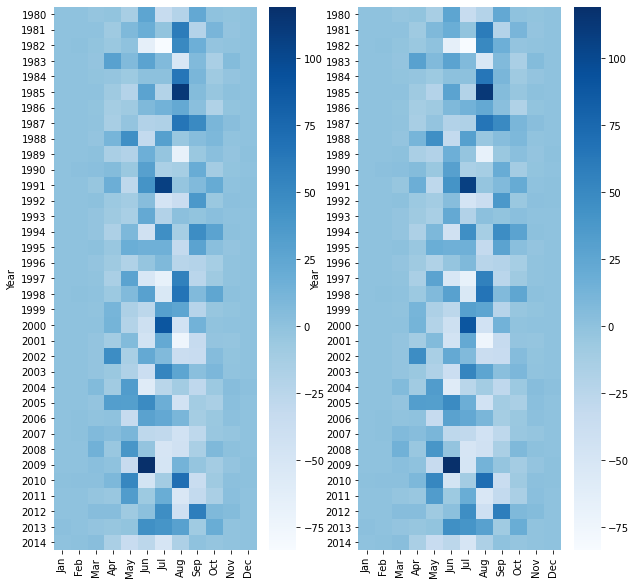

In [10]:
# Compare two files 
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.heatmap(maize_met_1.pivot_table(index='Year').reindex(maize_met_1.columns[1:], axis=1),cmap='Blues')
plt.subplot(1,2,2)
sns.heatmap(maize_met_2.pivot_table(index='Year').reindex(maize_met_2.columns[1:], axis=1),cmap='Blues')

In [11]:
maize_met_1=pd.read_table('./Crop_data_files/maize_met_anoms/Maize_Spring_China_Heilongjiang_temp_anom_real_Maize.csv')
maize_met_2=pd.read_table('./Crop_data_files/maize_met_anoms/Maize_Spring_China_Heilongjiang_temp_anom_real.csv')

In [12]:
# change column name to year
maize_met_1.rename(columns = {'Unnamed: 0':'Year'}, inplace = True)
maize_met_2.rename(columns = {'Unnamed: 0':'Year'}, inplace = True)


<AxesSubplot:ylabel='Year'>

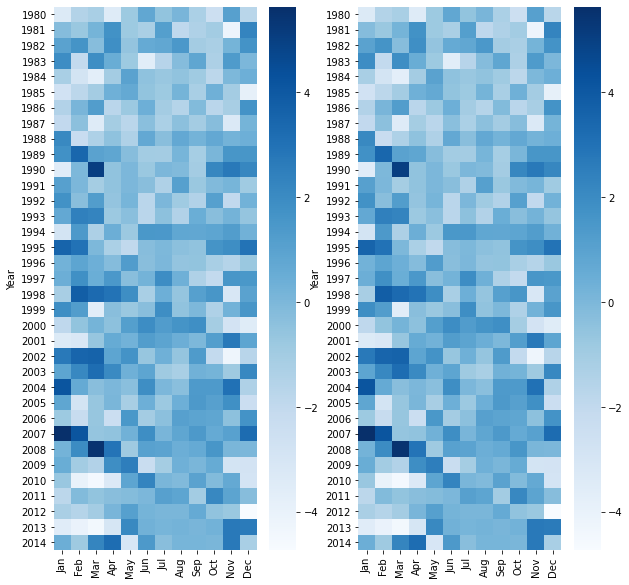

In [13]:
# Compare two files 
import seaborn as sns
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.heatmap(maize_met_1.pivot_table(index='Year').reindex(maize_met_1.columns[1:], axis=1),cmap='Blues')
plt.subplot(1,2,2)
sns.heatmap(maize_met_2.pivot_table(index='Year').reindex(maize_met_2.columns[1:], axis=1),cmap='Blues')

## Yield
There also exist yield data files. We look at yield anomalies because there tends to be an increasing trend in yield over time which is not related to weather. Instead, the fluctuations around the long-term trend are related to weather events. 

In [14]:
pd.read_table('./Crop_data_files/Maize_median_yield_anoms.csv')

,Unnamed: 0,Region,1960,1961,1962,1963,1964,1965,1966,1967,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,0,Maize_Spring_USA_Nebraska,-0.06276,-0.15690,0.40794,0.00000,-0.40794,0.00000,0.37656,0.00000,...,0.00000,-0.50208,0.00000,0.00000,1.00416,0.18828,-0.37656,-1.506240,0.28242,0.62760
1,1,Maize_Spring_USA_Iowa,-0.75312,-0.04707,0.00000,0.15690,-0.15690,0.00000,0.03138,-0.03138,...,0.12552,-0.31380,0.00000,0.00000,0.62760,-0.37656,0.43932,-1.757280,-0.25104,0.87864
2,2,Maize_Spring_USA_Illinois,-0.69036,-0.18828,0.31380,0.12552,-0.31380,0.43932,-0.50208,0.62760,...,-1.31796,-0.75312,0.06276,0.31380,0.00000,0.00000,0.00000,-3.263520,0.65898,1.38072
3,3,Maize_Spring_USA_Indiana,-0.37656,-0.25104,0.50208,0.31380,-0.62760,0.50208,-0.37656,-0.12552,...,0.00000,0.00000,-0.18828,0.18828,0.87864,0.00000,-0.69036,-3.640080,0.97278,0.69036
4,4,Maize_Spring_USA_Minnesota,-0.34518,0.15690,0.00000,0.50208,-0.18828,-0.50208,0.25104,-0.25104,...,0.94140,0.00000,-1.00416,0.00000,0.75312,0.75312,-0.62760,0.376560,0.09414,-0.18828
5,5,Maize_Spring_USA_Ohio,-0.37656,-0.06276,0.12552,0.25104,-0.69036,-0.25104,0.31380,-0.31380,...,-0.81588,0.56484,0.00000,-1.75728,1.12968,0.43932,-0.43932,-2.510400,0.65898,0.12552
6,6,Maize_Spring_China_Jilin,-0.23500,0.11935,-0.03450,-0.04300,0.05020,-0.05020,0.00000,0.13240,...,0.18101,0.58294,-0.18101,0.54988,-0.45689,-0.54988,0.00000,0.194480,0.08097,NaN
7,7,Maize_Spring_China_Liaoning,-0.49600,-0.05390,0.00000,0.00000,0.00000,0.00000,0.00000,0.17770,...,0.01228,-0.19889,-0.26599,0.46488,-0.93963,-0.81114,0.00000,0.039145,0.51029,NaN
8,8,Maize_Spring_China_Heilongjiang,1.41700,-0.28565,0.00000,0.07270,-0.09070,-0.00440,0.00000,0.35160,...,0.38670,0.00000,-0.98415,0.28129,-0.28129,0.00000,0.26910,-0.134550,0.07151,NaN
9,9,Maize_Summer_China_Hebei,-0.10190,0.05095,0.01090,-0.17080,0.00000,0.00000,0.15120,0.07440,...,0.00000,0.00000,0.00079,0.10930,-0.04865,-0.06144,0.00000,0.004350,0.07125,NaN


## Regions
There also exists a regions file. This contains a list of all the combinations we will be looking at, with each combination named as:

"Crop" _ "Season" _ "Country" _ "State"


In [15]:
regions=pd.read_table('./Crop_data_files/region_names.csv')

In [16]:
regions[0:10]

,Unnamed: 0,Name
0,0,Maize_Spring_USA_Ohio
1,1,Wheat_Spring_USA_SouthDakota
2,2,Maize_Spring_USA_Minnesota
3,3,Maize_Summer_China_Henan
4,4,Soybean_USA_Illinois
5,5,Soybean_USA_Minnesota
6,6,Wheat_Winter_France_All
7,7,Wheat_Spring_USA_Idaho
8,8,Rice_Mid_China_Heilongjiang
9,9,Soybean_USA_Iowa


In [17]:
print("There are "+str(len(regions))+" combinations")

There are 94 combinations
